____

__Universidad Tecnológica Nacional, Buenos Aires__<br/>
__Ingeniería Industrial__<br/>
__Cátedra de Ciencia de Datos - Curso I5521 - Turno Jueves Noche__<br/>
__clase_09: Practica Clustering & PCA: Wine Dataset__<br/>
__Elaborado por: Nicolas Aguirre__<br/>
____

# Importamos Librerias

In [1]:
# Importamos las librerías necesarias para trabajar.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
# Importamos librerias de Clustering
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, rand_score
# Importamos librerias de PCA
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib
matplotlib.__version__

'3.8.0'

# Importamos Dataset

**Repositorio del Dataset**

https://archive.ics.uci.edu/ml/datasets/Wine

**Wine Data Set:**

https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data


In [4]:
# Nombres de columnas
names_col = ['G','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols',
             'Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue',
             'OD280/OD315 of diluted wines','Proline']

wine_df = pd.read_csv('wine.data', delimiter=',', names=names_col)

In [5]:
wine_df.head()

,G,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
wine_df.shape

(178, 14)

In [7]:
wine_df.isnull().sum()

G                               0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [8]:
# Definimos las features que corresponden a X
x = wine_df.iloc[:,1:]
y = wine_df.iloc[:,0]
display(x.head())
print(x.shape)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


(178, 13)


In [9]:
# Vamos a crear un dataframe para guardar los resultados
results_df = pd.DataFrame(columns=['Cluster','Rand_','Sil_'])

# Auto-Scaling

In [10]:
# Realizamos un autoscaling con los datos, para todas las features
scaler = StandardScaler().fit(x)
xscal = scaler.transform(x)

# K-Means

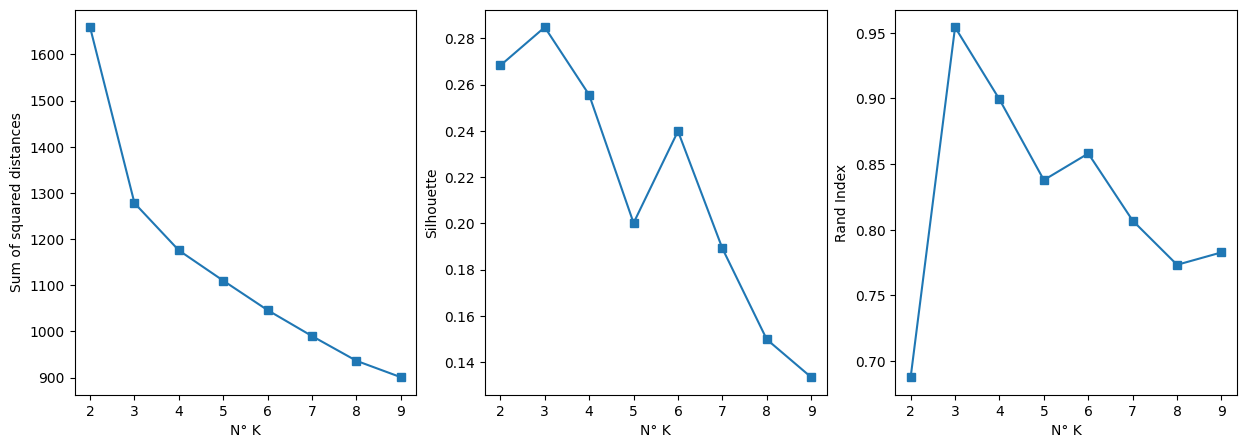

In [11]:
dist_cent = []
sil_list = []
rand_list = []
for k in range(2, 10):
    # Creamos el objecto de cluster y lo fiteamos en la misma linea utilizado xscal
    kmeans = KMeans(n_clusters=k, random_state=1).fit(xscal)
    centers_i = kmeans.cluster_centers_ # Centroide de cada cluster
    labels_i = kmeans.labels_ # Labels de cada muestra    
    # Silhouttte Score
    sil_score_i = silhouette_score(xscal,labels_i)
    sil_list.append(sil_score_i)        
    # Rand_Index
    rand_index_i = rand_score(y,labels_i)
    rand_list.append(rand_index_i)
    dist_cent.append(kmeans.inertia_)    
# Plot de metricas
fig, axs = plt.subplots(1,3,figsize=(15,5))    
axs[0].plot(range(2, 10), dist_cent, marker='s');
axs[0].set_xlabel('N° K')
axs[0].set_ylabel('Sum of squared distances')
# Silhoute plot
axs[1].plot(range(2, 10), sil_list, marker='s');
axs[1].set_xlabel('N° K')
axs[1].set_ylabel('Silhouette')
# Rand Index plot
axs[2].plot(range(2, 10), rand_list, marker='s');
axs[2].set_xlabel('N° K')
axs[2].set_ylabel('Rand Index')    
plt.show()


## P.C.A.


**Generamos un PCA con los datos luego del autoscaling**

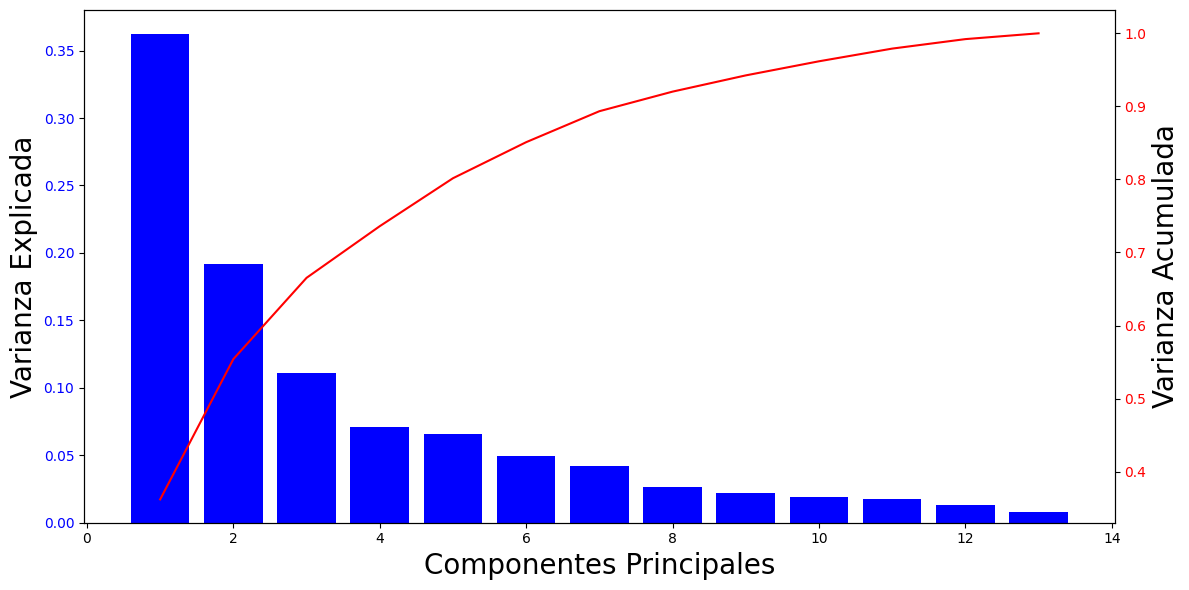

In [12]:
# Definimos la cantidad de componentes
n_comps = 13
components = range(1,n_comps + 1)
#Creamos el objeto PCA
pca = PCA(n_components=n_comps)

# Ajustamos
pca.fit(xscal)
# Transformamos
xpca = pca.transform(xscal)

# Porcentaje de la varianza explicada por cada Principal Component (PC)
eigenvalues = pca.explained_variance_ratio_

# Suma acumulada
eigenvalues_acum = pca.explained_variance_ratio_.cumsum() 

# Graficamos
# Eje Izquierdo
fig, ax1 = plt.subplots(figsize=(12,6))
ax1.set_xlabel('Componentes Principales',fontsize=20)
ax1.set_ylabel('Varianza Explicada', color='k',fontsize=20)
ax1.bar(components, eigenvalues, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Eje derecho
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Varianza Acumulada', color='k',fontsize=20) 
ax2.plot(components, eigenvalues_acum, color='red') 
ax2.tick_params(axis='y', labelcolor='red')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

### Eigenvectors ($\mathbf v$)

In [13]:
# De la libreria:
# 'Principal axes in feature space, representing the directions of maximum variance in the data'
# The components are sorted by explained_variance_
pd.DataFrame(pca.components_[0:n_comps,:],columns=x.columns)

# En criollo:
# Es la direccion de los ejes de cada componente (autovectores)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,0.144329,-0.245188,-0.002051,-0.239320,0.141992,0.394661,0.422934,-0.298533,0.313429,-0.088617,0.296715,0.376167,0.286752
1,-0.483652,-0.224931,-0.316069,0.010591,-0.299634,-0.065040,0.003360,-0.028779,-0.039302,-0.529996,0.279235,0.164496,-0.364903
2,-0.207383,0.089013,0.626224,0.612080,0.130757,0.146179,0.150682,0.170368,0.149454,-0.137306,0.085222,0.166005,-0.126746
3,-0.017856,0.536890,-0.214176,0.060859,-0.351797,0.198068,0.152295,-0.203301,0.399057,0.065926,-0.427771,0.184121,-0.232071
4,-0.265664,0.035214,-0.143025,0.066103,0.727049,-0.149318,-0.109026,-0.500703,0.136860,-0.076437,-0.173615,-0.101161,-0.157869
5,-0.213539,-0.536814,-0.154475,0.100825,-0.038144,0.084122,0.018920,0.258594,0.533795,0.418644,-0.105983,-0.265851,-0.119726
6,-0.056396,0.420524,-0.149171,-0.286969,0.322883,-0.027925,-0.060685,0.595447,0.372139,-0.227712,0.232076,-0.044764,0.076805
7,-0.396139,-0.065827,0.170260,-0.427970,0.156361,0.405934,0.187245,0.233285,-0.368227,0.033797,-0.436624,0.078108,-0.120023
8,0.508619,-0.075283,-0.307694,0.200449,0.271403,0.286035,0.049578,0.195501,-0.209145,0.056218,0.085828,0.137227,-0.575786
9,0.211605,-0.309080,-0.027125,0.052799,0.067870,-0.320131,-0.163151,0.215535,0.134184,-0.290775,-0.522399,0.523706,0.162116


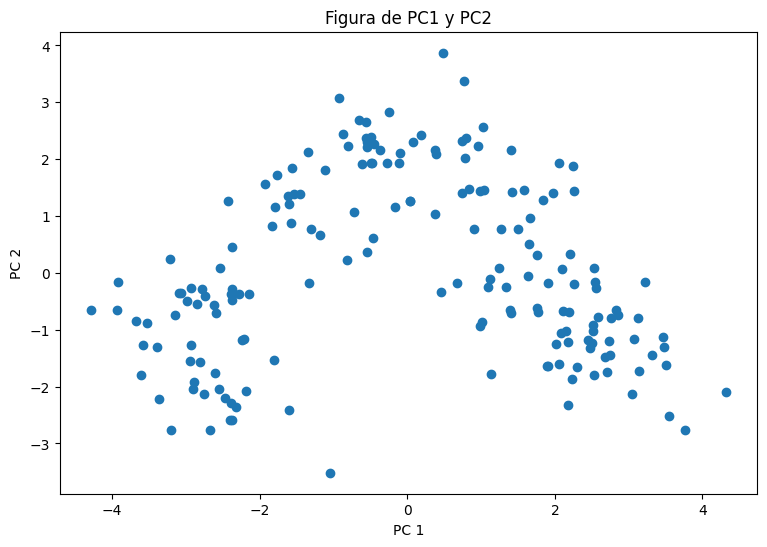

In [14]:
# Scatter plot de los datos, solamente con 2 PC
plt.figure(figsize=(9,6))
plt.scatter(xpca[:,0],xpca[:,1])    
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Figura de PC1 y PC2')
plt.show()

**Pregunta: Que cantidad de clusters seleccionariamos? Porque?**

In [15]:
# Generamos un modelo de K means con ##RESPONDER## clusters con los datos autoscalados
rta = 3
kmeans = KMeans(n_clusters = rta,
                random_state = 10).fit(xscal)

In [16]:
# Visualizamos los centroides finales de cada cluster
centers = kmeans.cluster_centers_
centers

array([[ 0.83523208, -0.30380968,  0.36470604, -0.61019129,  0.5775868 ,
         0.88523736,  0.97781956, -0.56208965,  0.58028658,  0.17106348,
         0.47398365,  0.77924711,  1.12518529],
       [-0.92607185, -0.39404154, -0.49451676,  0.17060184, -0.49171185,
        -0.07598265,  0.02081257, -0.03353357,  0.0582655 , -0.90191402,
         0.46180361,  0.27076419, -0.75384618],
       [ 0.16490746,  0.87154706,  0.18689833,  0.52436746, -0.07547277,
        -0.97933029, -1.21524764,  0.72606354, -0.77970639,  0.94153874,
        -1.16478865, -1.29241163, -0.40708796]])

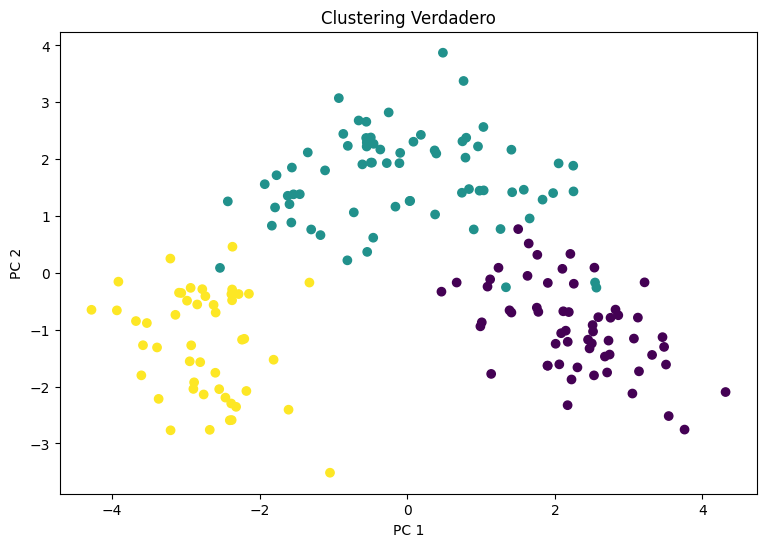

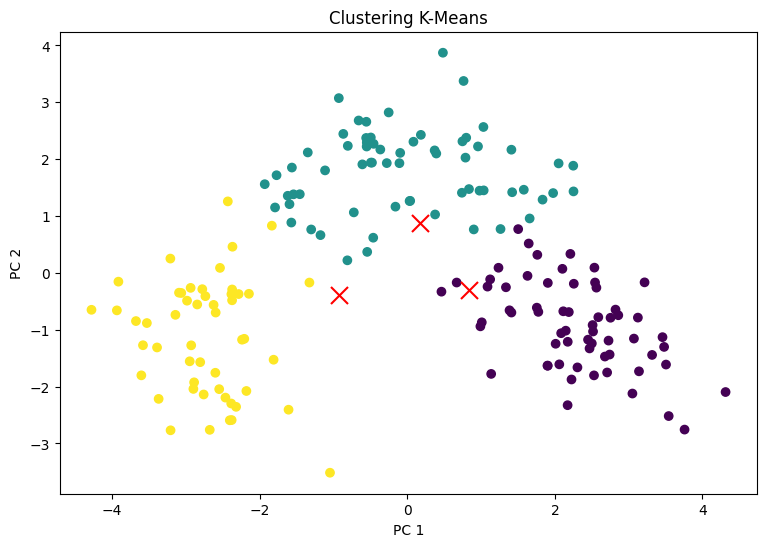

In [17]:
# Scatter plot de muestras y centroides con 2 PC: segun Cluster verdadero vs Clustering con K-Means

#Verdadero
plt.figure(figsize=(9,6))
plt.scatter(xpca[:,0],xpca[:,1],c=wine_df['G'].astype(float))    
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Clustering Verdadero')
# K-Means
plt.figure(figsize=(9,6))
plt.scatter(xpca[:,0],xpca[:,1],c=kmeans.labels_.astype(float))
plt.scatter(centers[:,0], centers[:,1], marker="x", color='r',s=150)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Clustering K-Means')
plt.show()

**PREGUNTA:**

**¿Son correctos los centroides?**

## Métricas de K-means

In [19]:
# Silhouttte Score
sil_score = silhouette_score(xscal,kmeans.labels_)
# Rand_Index
rand_index = rand_score(y,kmeans.labels_)

# Crear el nuevo DataFrame con los resultados a agregar
new_row = pd.DataFrame({
    'Cluster': ['Kmeans'],
    'Rand_': [rand_index],
    'Sil_': [sil_score]
})

# Concatenar el nuevo DataFrame al existente
results_df = pd.concat([results_df, new_row], ignore_index=True)

results_df

,Cluster,Rand_,Sil_
0,Kmeans,0.954294,0.284859


# PCA + K-Means

**Ahora vamos dejar de usar las variables originales.**

**Vamos a clusterizar con lo que nos puedan explicar UNICAMENTE las primeras 2 PC, y compararemos los resultados.**

## 2 PC

In [20]:
# Cantidad de PC quer queremos
reduced_dim = 2
# Definimos nuetro nuevo X de dimension reducida
xpca_rd = xpca[:,0:reduced_dim]

In [21]:
# Generamos el modelo PCA + K-means
kmeans_rd = KMeans(n_clusters=3, 
                   random_state=10).fit(xpca_rd)

In [22]:
# visualizamos los centroides finales de cada cluster
centers_rd = kmeans_rd.cluster_centers_
centers_rd

array([[ 2.26614991, -0.86559213],
       [-0.16278513,  1.76758824],
       [-2.74392982, -1.2141906 ]])

**Scatter plot con 2 PC:**

**Cluster verdadero vs Clustering con PCA+K-Means**

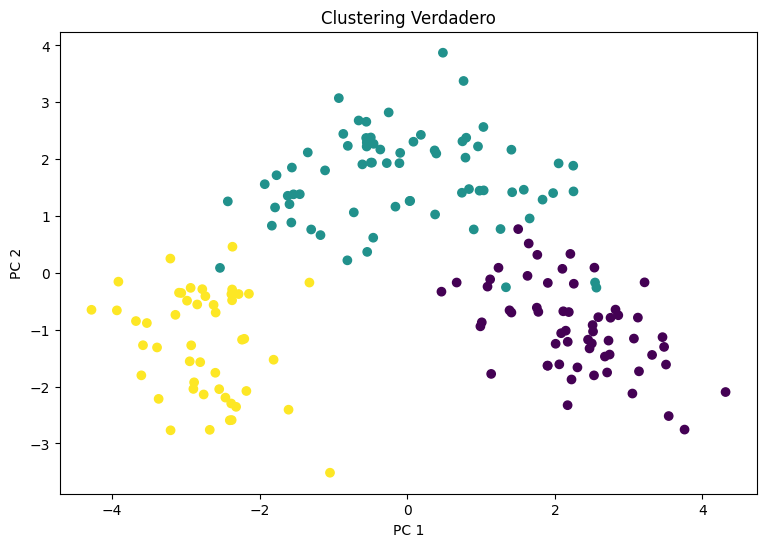

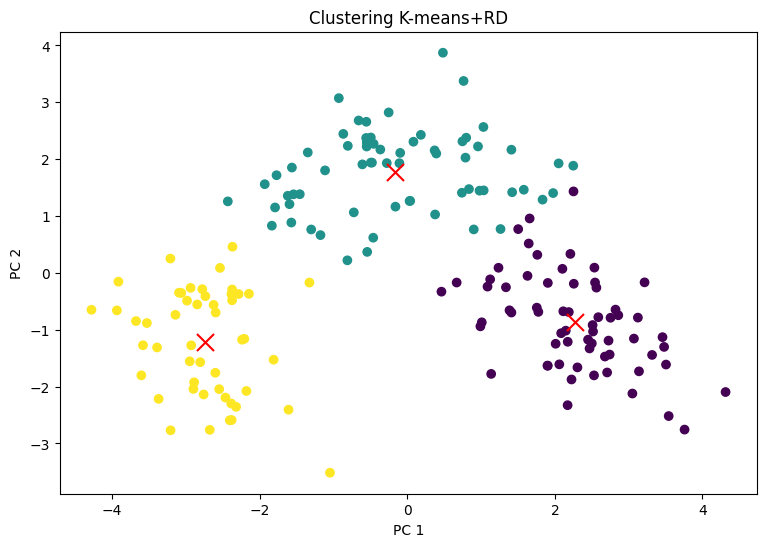

In [23]:
#Verdadero
plt.figure(figsize=(9,6))
plt.scatter(xpca[:,0],xpca[:,1],c=wine_df['G'].astype(float))    
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Clustering Verdadero')
# PCA + K-Means
plt.figure(figsize=(9,6))
plt.scatter(xpca_rd[:,0],xpca_rd[:,1],c=kmeans_rd.labels_.astype(float))
plt.scatter(centers_rd[:,0], centers_rd[:,1], marker="x", color='r',s=150)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Clustering K-means+RD')
plt.show()

**PREGUNTA:**

**¿Y aca que sucedió?**

### Metricas

In [26]:
# Silhouttte Score
sil_score = silhouette_score(xpca_rd,kmeans_rd.labels_)
# Rand_Index
rand_index = rand_score(y,kmeans_rd.labels_)


# Crear un nuevo DataFrame con los resultados a agregar
new_row = pd.DataFrame({
    'Cluster': ['2 PC + Kmeans'],
    'Rand_': [rand_index],
    'Sil_': [sil_score]
})

# Concatenar el nuevo DataFrame con el existente
results_df = pd.concat([results_df, new_row], ignore_index=True)

# Mostrar el DataFrame actualizado
results_df

,Cluster,Rand_,Sil_
0,Kmeans,0.954294,0.284859
1,2 PC + Kmeans,0.953152,0.561051


In [27]:
pd.DataFrame(pca.components_[0:reduced_dim,:],columns=x.columns)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,0.144329,-0.245188,-0.002051,-0.239320,0.141992,0.394661,0.422934,-0.298533,0.313429,-0.088617,0.296715,0.376167,0.286752
1,-0.483652,-0.224931,-0.316069,0.010591,-0.299634,-0.065040,0.003360,-0.028779,-0.039302,-0.529996,0.279235,0.164496,-0.364903


## 3 PC

In [28]:
# Cantidad de PC quer queremos
reduced_dim = 3
xpca_rd = xpca[:,0:reduced_dim]
# Generamos el modelo PCA + K-means 
kmeans_rd = KMeans(n_clusters=3, 
                   random_state=10).fit(xpca_rd)
centers_rd = kmeans_rd.cluster_centers_
centers_rd

%matplotlib notebook
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(projection='3d')
ax.scatter3D(xpca[:,0], xpca[:,1],xpca[:,3], c=kmeans_rd.labels_)
ax.scatter3D(centers_rd[:,0], centers_rd[:,1],centers_rd[:,2], marker="o", color='r',s=150)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
plt.show()

<IPython.core.display.Javascript object>

### Metricas

In [32]:
# Silhouttte Score
sil_score = silhouette_score(xpca_rd,kmeans_rd.labels_)
# Rand_Index
rand_index = rand_score(y,kmeans_rd.labels_)

new_row = pd.DataFrame({
    'Cluster': ['3 PC + Kmeans'],
    'Rand_': [rand_index],
    'Sil_': [sil_score]
})

#Guardamos los resultados
results_df = pd.concat([results_df,new_row])
results_df

,Cluster,Rand_,Sil_
0,Kmeans,0.954294,0.284859
1,2 PC + Kmeans,0.953152,0.561051
0,3 PC + Kmeans,0.946677,0.453235


**Pregunta:**

**Que Conclusiones sacamos ??**

**Cual es la cantidad maxima de PC que podriamos usar? Porque?**

# Recontruccion

**Si quisieramos volver a nuestro espacio original, consideremos que:**

$Z = X \cdot \mathbf{V} \rightarrow \hat X = Z \cdot \mathbf{V}^T$

siendo $Z$ la proyeccion de X en el nuevo subspace.

Como vimos en la clase, los datos tienen que ser centrados (como minimo!)

Para cumplir con las ecuaciones y volver a tener nuestra $\hat X$, deberiamos sumarle las medias ...

**A)** $\hat X = Z \cdot \mathbf{V}^T + \mu$

Pero en nuestro caso Standarizamos los datos ($\mu = 0, \sigma = 1$). Entonces debemos re escalar teniendo en cuenta $\sigma$ antes de sumar $\mu$.

**B)** $\hat X = ( Z  \cdot \mathbf{V}^T) \cdot \sigma + \mu $

In [33]:
mu = np.mean(x, axis=0)
std = np.std(x, axis=0)[:,np.newaxis].T

# 2 PCA
reduced_dim = 13
xpca_rd = xpca[:,0:reduced_dim]
x_rec = np.dot(xpca_rd, pca.components_[0:reduced_dim,:])
x_rec = x_rec * std
x_rec += mu

x_rec_df = pd.DataFrame(x_rec,columns=x.columns)

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

In [37]:

x_array = x.values  # Convertir x a un numpy array

# Calcular la media y la desviación estándar
mu = np.mean(x_array, axis=0)
std = np.std(x_array, axis=0)

# 2 PCA
reduced_dim = 13
xpca_rd = xpca[:, 0:reduced_dim]
x_rec = np.dot(xpca_rd, pca.components_[0:reduced_dim, :])

# Normalizar la reconstrucción con la desviación estándar y agregar la media
x_rec = x_rec * std
x_rec += mu

# Convertir el resultado a DataFrame con las columnas originales
x_rec_df = pd.DataFrame(x_rec, columns=x.columns)



In [36]:
# Samples de la reconstruccion
sample = np.random.randint(0,high=x.shape[0])

display(x.iloc[sample,:].to_frame().transpose())
display(x_rec_df.iloc[sample,:].to_frame().transpose())

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0


,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0


**Resumen**:

* Cuando los datos son centrados, la reconstruccion se hace teniendo en cuenta que:

**A)**  $\hat X = Z \cdot \mathbf{V}^T + \mu $


* Cuando ademas los datos son standarizados, la reconstruccion se hace teniendo en cuenta que:

**B)**   $\hat X = (Z \cdot \mathbf{V}^T) \cdot \sigma  + \mu $

**Preguntas:**

**Cuando debemos centrar y cuando estandarizar?**

**La presencia de outliers puede modificar el resultado del PCA? Porque?**

**Podemos hacer PCA sobre features categoricas?**